## Does weather play a factor in when deliveries occur

In [1]:
#Import Libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns 
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [2]:
#load dataset into a dataframe
df_raw = pd.read_csv('FinalDataSets\Savage_Daily_Ticket_Count_Weather_Export.csv')
df_raw.head()

delivery_date      delivery_date_parsed  delivery_date_year  \
0    2010-12-09  2010-12-09T00:00:00.000Z                2010   
1    2010-12-10  2010-12-10T00:00:00.000Z                2010   
2    2010-12-14  2010-12-14T00:00:00.000Z                2010   
3    2010-12-16  2010-12-16T00:00:00.000Z                2010   
4    2010-12-17  2010-12-17T00:00:00.000Z                2010   

   delivery_date_month  delivery_date_day  delivery_day_of_week  \
0                   12                  9                     4   
1                   12                 10                     5   
2                   12                 14                     2   
3                   12                 16                     4   
4                   12                 17                     5   

   delivery_count_sum  DailyAverageRelativeHumidity  \
0                   6                          75.0   
1                   8                          68.0   
2                   1                          73.0   
3                   1                          65.0   
4                   1                          70.0   

   DailyAverageSeaLevelPressure  DailyAverageStationPressure  ...  \
0                         29.89                        28.92  ...   
1                         29.94                        29.00  ...   
2                         30.25                        29.27  ...   
3                         29.97                        29.03  ...   
4                         30.06                        29.11  ...   

   Precip_12PM-6PM  Precip_2PM-6PM  Precip_6PM-12AM  \
0        No Precip       No Precip        No Precip   
1        No Precip       No Precip     Light Precip   
2        No Precip       No Precip        No Precip   
3        No Precip       No Precip        No Precip   
4        No Precip       No Precip        No Precip   

   WindSpeed_12AM-6AM_avg_val  WindSpeed_6AM-10AM_avg_val  \
0                        8.58                       11.28   
1                        9.92                        8.38   
2                        1.42                        2.33   
3                        3.83                        1.93   
4                        4.58                       10.25   

   WindSpeed_10AM-2PM_avg_val  WindSpeed_12PM-6PM_avg_val  \
0                       11.00                        7.50   
1                        2.50                        3.17   
2                        5.18                        7.62   
3                        5.63                        5.75   
4                       11.50                       12.00   

   WindSpeed_2PM-6PM_avg_val  WindSpeed_6AM-12PM_avg_val  \
0                       6.25                       11.52   
1                       3.75                        6.58   
2                       7.75                        2.55   
3                       5.75                        3.12   
4                      12.25                       10.67   

   WindSpeed_6PM-12AM_avg_val  
0                        5.47  
1                       10.57  
2                        7.25  
3                        3.67  
4                       12.17  

[5 rows x 50 columns]

In [4]:
#Check for correlations among existing data pieces.  Dependent variable is "delivery_count_sum"
df_raw.corr()['delivery_count_sum'].sort_values(ascending=False)

delivery_count_sum                            1.000000
delivery_date_year                            0.159710
log_DailyPrecipitation                        0.069298
Prior2DayPrecipitationAmt                     0.056086
DailyDepartureFromNormalAverageTemperature    0.051191
Prior2DayPeakWindSpeed                        0.044409
DailyPeakWindSpeed                            0.032606
PriorDayPeakWindSpeed                         0.032177
Prior2DaySustainedWindSpeedValue              0.030986
PriorDaySustainedWindSpeedValue               0.016135
PriorDayPrecipitationAmt                      0.015692
WindSpeed_2PM-6PM_avg_val                     0.013698
PriorDayAverageWindSpeedDiff                  0.011689
WindSpeed_12PM-6PM_avg_val                    0.008883
Prior2DayAverageWindSpeedDiff                 0.007880
DailySustainedWindSpeed                       0.007479
PriorDayPeakWindSpeedDiff                     0.001348
PriorDayPrecipitationDiff                    -0.002015
delivery_d

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\function_base.py:151: RuntimeWarning: invalid value encountered in multiply
  y *= step
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\function_base.py:161: RuntimeWarning: invalid value encountered in add
  y += start
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


<AxesSubplot:xlabel='log_DailyPrecipitation', ylabel='delivery_count_sum'>

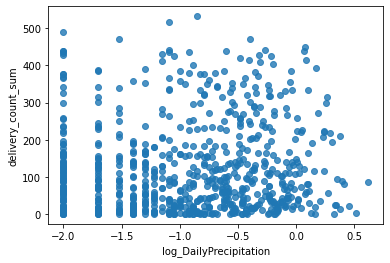

In [7]:
#plot out some values
sns.regplot(x='log_DailyPrecipitation',y='delivery_count_sum',data=df_raw)

In [28]:
#create X and Y
#x = df_raw[df_raw.columns[~df_raw.columns.isin(['delivery_count_sum'])]]
x = df_raw[['delivery_date_year','delivery_date_month','delivery_date_day','delivery_day_of_week','DailyAverageRelativeHumidity','DailyAverageSeaLevelPressure','DailyAverageStationPressure','DailyAverageWindSpeed','DailyDepartureFromNormalAverageTemperature','DailyPeakWindDirection','DailyPeakWindSpeed','log_DailyPrecipitation','log_DailySnowDepth','log_DailySnowfall','DailySustainedWindSpeed','PriorDayWindSpeed','Prior2DayAverageWindSpeed','PriorDayAverageWindSpeedDiff','Prior2DayAverageWindSpeedDiff','PriorDayPeakWindSpeed','Prior2DayPeakWindSpeed','PriorDayPeakWindSpeedDiff','Prior2DayPeakWindSpeedDiff','PriorDayPrecipitationAmt','Prior2DayPrecipitationAmt','PriorDayPrecipitationDiff','Prior2DayPrecipitationDiff','PriorDaySnowfallAmt','PriorDaySnowfallDiff','PriorDaySustainedWindSpeedValue','Prior2DaySustainedWindSpeedValue','PriorDaySustainedWindSpeedDiff','Prior2DaySustainedWindSpeedDff','WindSpeed_12AM-6AM_avg_val','WindSpeed_6AM-10AM_avg_val','WindSpeed_10AM-2PM_avg_val','WindSpeed_12PM-6PM_avg_val','WindSpeed_2PM-6PM_avg_val','WindSpeed_6AM-12PM_avg_val','WindSpeed_6PM-12AM_avg_val']]
y = df_raw['delivery_count_sum']

In [29]:
lm = LinearRegression()
lm.fit(x,y)

#need to make the category variables binary

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').